In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Activation

2024-06-11 15:11:54.347876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 15:11:54.347934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 15:11:54.349407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

In [40]:
DIRECTORY= "/kaggle/input/livdet2011-dataset/Sagem/training/"
CATEGORIES= ["fake","live"]

In [41]:
data=[]

for categories in CATEGORIES:
    #reach source folder
    folder=os.path.join(DIRECTORY,categories)
    label=CATEGORIES.index(categories)  
   
    #read images
    for img in os.listdir(folder):
        img=os.path.join(folder,img)   
       
        #convert read images to array
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(300,300))
        data.append([img_arr,label])
        
        

In [42]:
random.shuffle(data)

In [43]:
#Seperating X and Y data
x=[] #features
y=[] #labels

for feature, label in data:
    x.append(feature)
    y.append(label)

x=np.array(x)
y=np.array(y)

In [44]:
#rescaling the features
x=x/255
x.shape

(2016, 300, 300, 3)

In [101]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),input_shape=x.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(24,kernel_size=(3,3),input_shape=x.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(36,activation="relu"))
model.add(Dense(18,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 298, 298, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 97, 97, 24)     │        13,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 24576)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 36)             │       884,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 18)             │           666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │            38 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,116 (3.44 MB)

 Trainable params: 901,116 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"],
    
)

In [103]:
history= model.fit(x,y,epochs=65,validation_split=0.2, shuffle=True)

Epoch 1/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5115 - loss: 0.6983 - val_accuracy: 0.5693 - val_loss: 0.6902
Epoch 2/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5261 - loss: 0.6914 - val_accuracy: 0.4629 - val_loss: 0.6927
Epoch 3/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5198 - loss: 0.6906 - val_accuracy: 0.7302 - val_loss: 0.6840
Epoch 4/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5861 - loss: 0.6852 - val_accuracy: 0.6460 - val_loss: 0.6768
Epoch 5/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5981 - loss: 0.6799 - val_accuracy: 0.7153 - val_loss: 0.6714
Epoch 6/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6452 - loss: 0.6736 - val_accuracy: 0.7500 - val_loss: 0.6627
Epoch 7/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6755 - loss: 0.6649 - val_accuracy: 0.7748 - val_loss: 0.6499
Epoch 8/65
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7075 - loss: 0.6510 - val_accuracy: 0.7896 - v

In [ ]:
#output_dir = '/kaggle/working'
#model_path = os.path.join(output_dir, 'HighAccModel_5.h5')

#Save the model
#model.save(model_path)

(0.0, 1.0)

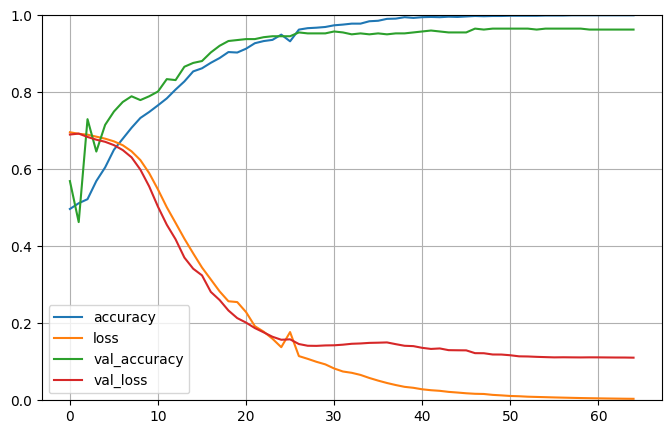

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [147]:
#prepage test data
TEST_DIRECTORY= "/kaggle/input/livdet2011-dataset/Biometrika/testing/"
CATEGORIES= ["fake","live"]

In [148]:
test_data=[]

for categories in CATEGORIES:
    #reach source folder
    folder=os.path.join(TEST_DIRECTORY,categories)
    label=CATEGORIES.index(categories)  
   
    #read images
    for img in os.listdir(folder):
        img=os.path.join(folder,img)   
       
        #convert read images to array
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(300,300))
        test_data.append([img_arr,label])

In [153]:
random.shuffle(test_data)

In [154]:
x_test=[] #features
y_test=[] #labels

for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)

x_test=np.array(x_test)
y_test=np.array(y_test)
x_test=x_test/255


In [155]:
#Testing the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5050 - loss: 8.2198


[8.32740306854248, 0.5]

In [130]:
output_dir = '/kaggle/working'
model_path = os.path.join(output_dir, 'Sagem2011_final.h5')

#Save the model
model.save(model_path)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report \n",classification_report(y_test, y_pred_classes))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


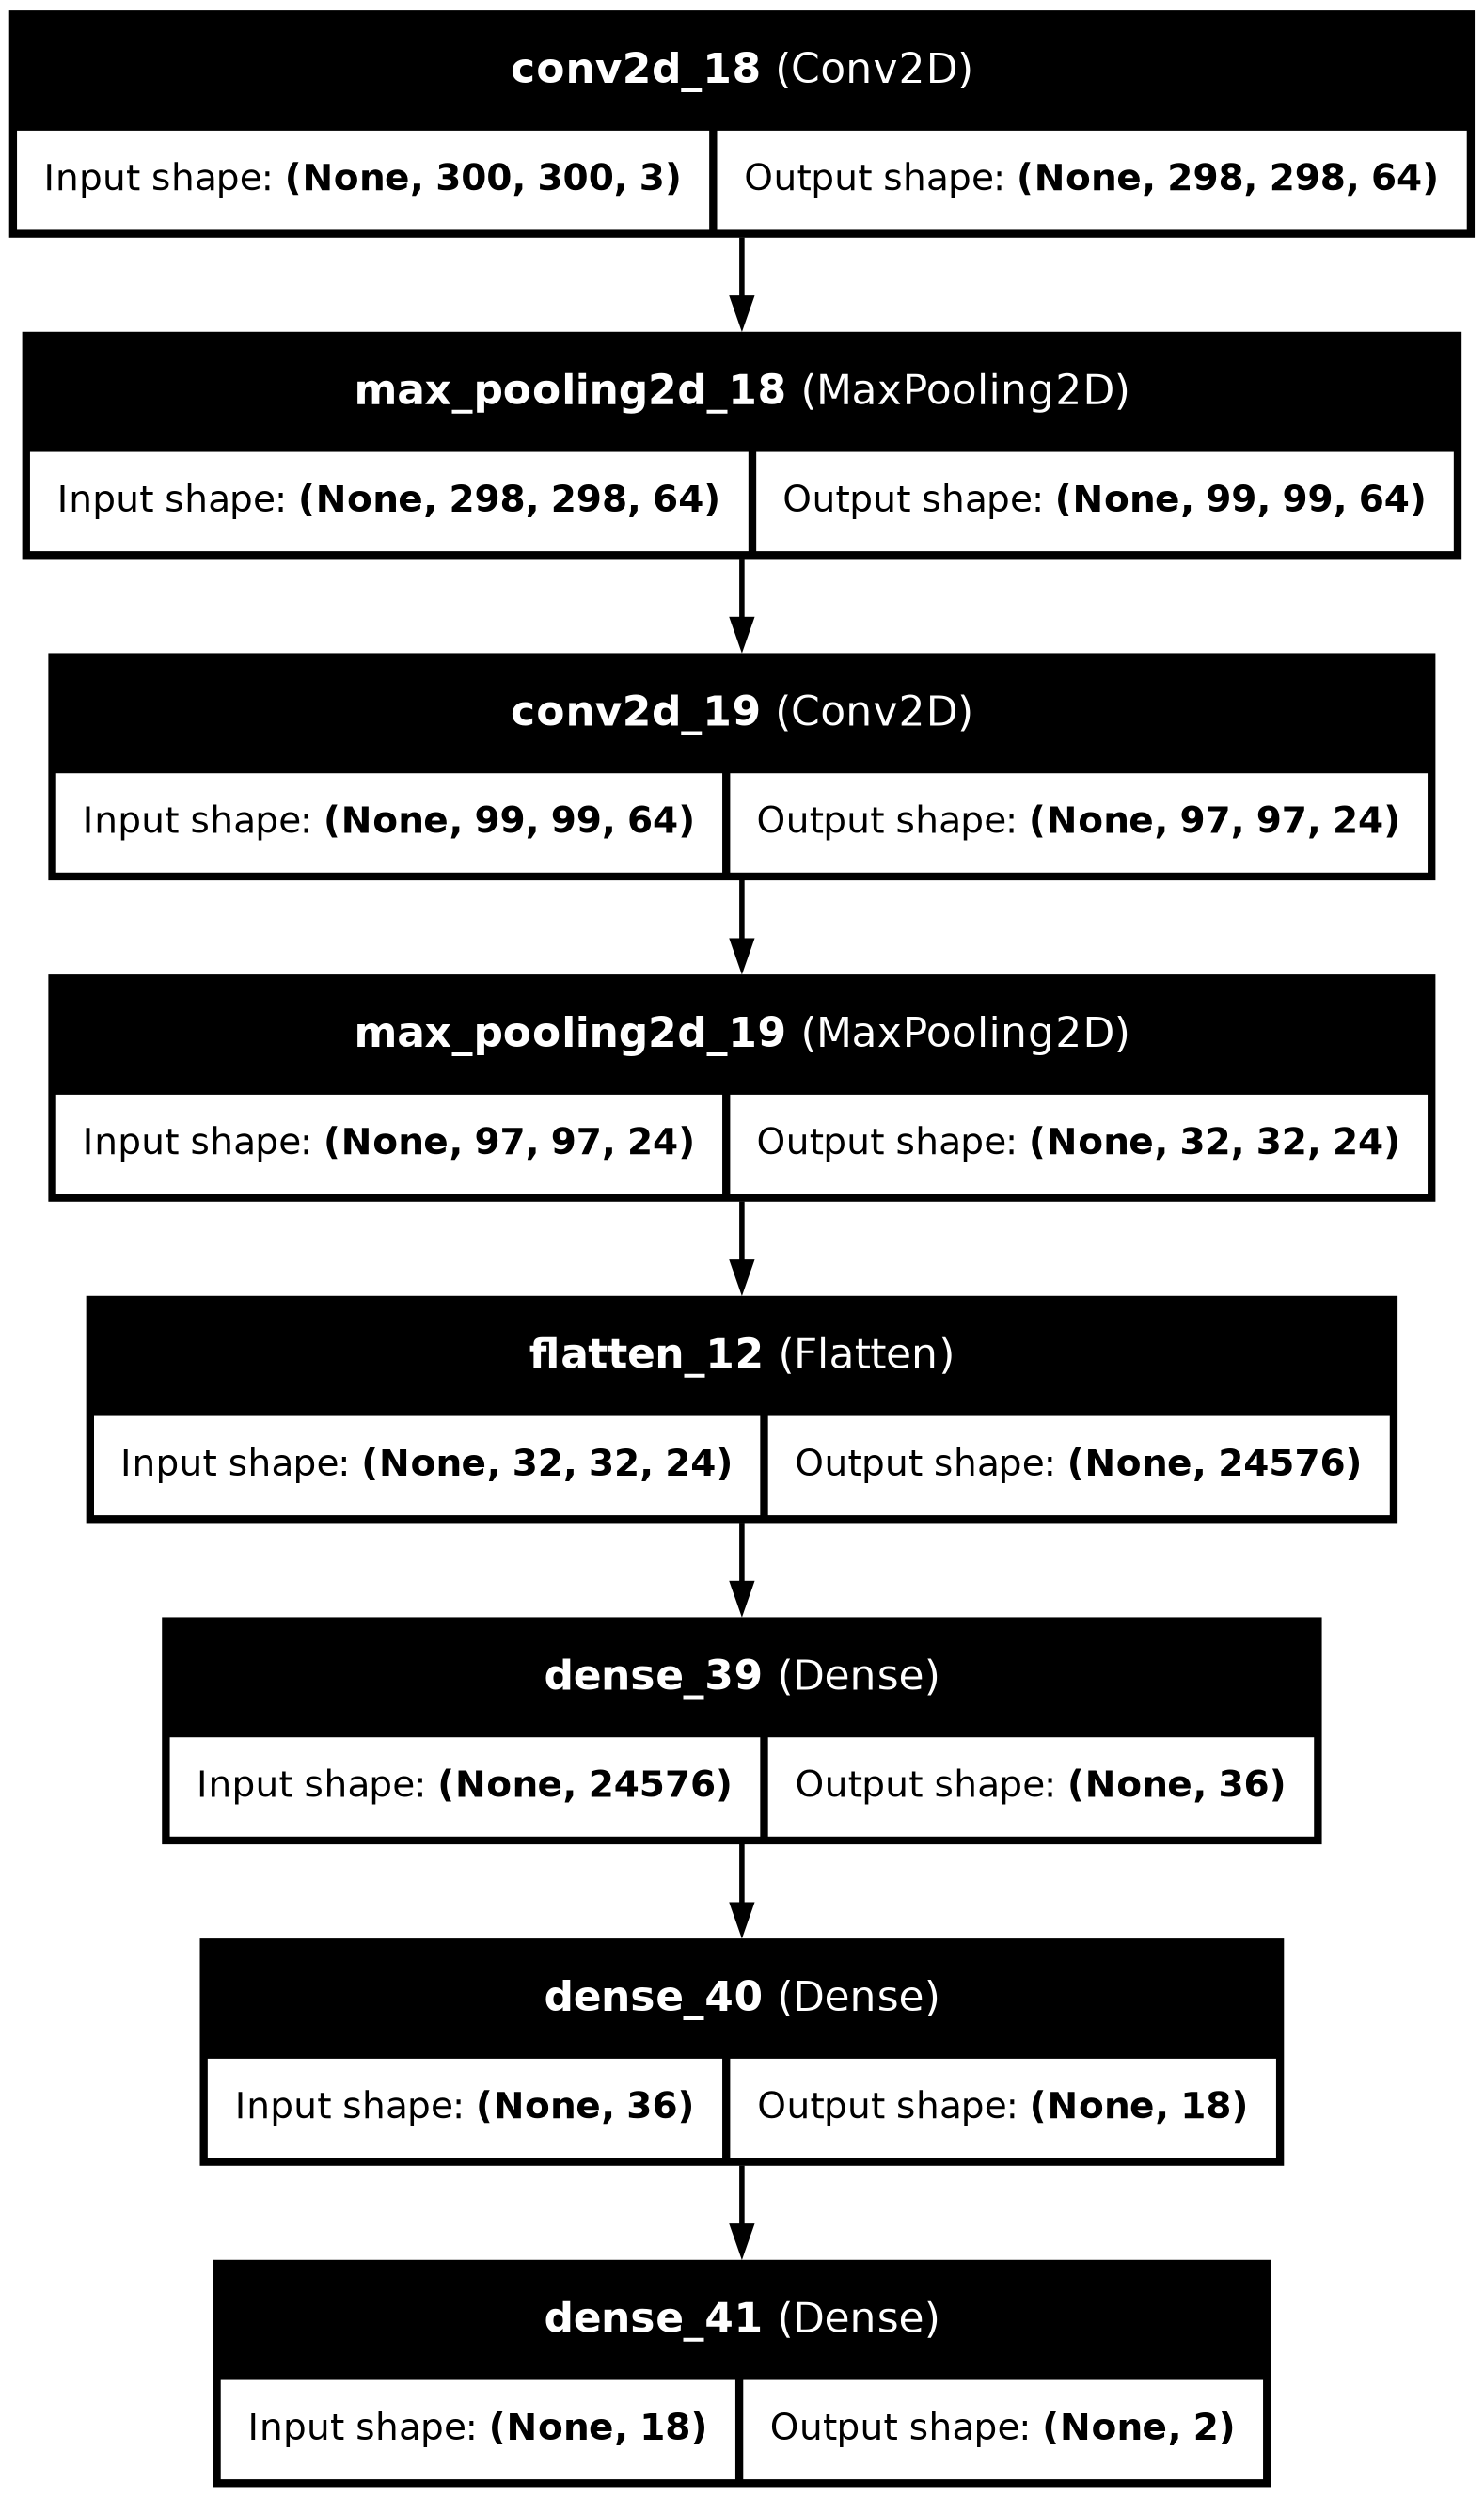

In [131]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Load Saved model
loaded_model=tf.keras.models.load_model("/kaggle/working/Digper2011_final.h5")

In [ ]:
#Testing the loaded model
loaded_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)
loaded_model.evaluate(x_test,y_test)

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "Digper_Pikel.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
#Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    loaded_pkl_model = pickle.load(file)


In [ ]:
loaded_pkl_model.evaluate(x_test,y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=loaded_model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report \n",classification_report(y_test, y_pred_classes))